# Наискорейший спуск на сфере
## Постановка задачи
$$\underset{\| x \|^2 - 1 = 0}{min} f(x) = x^T A x$$


In [56]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## В следующей ячейке в первой строке задается матрица квадратичной формы.
### Далее заранее обсчитываются квадрат и куб этой матрицы, задается начальное приближение, потом сразу же проецируется на сферу.

In [3]:
A = np.array([[1., 1., -1.], [1., 100., 0], [-1.,0,1.]])

In [5]:
print A


[[   1.    1.   -1.]
 [   1.  100.    0.]
 [  -1.    0.    1.]]


## В следующей ячейке задается функция, которая возвращает значение второй производной целевой функции при выборе шага (см pdf)
$$F'' = \frac{\gamma^3 (-2a_2\widehat{a_2} )+ \gamma^2 (-3a_2\widehat{a_1}) + \gamma(2\widehat{a_2}a_0 - 4a_2\widehat{a_0} + 2a_1\widehat{a_1}) + \widehat{a_1}a_0 + 4a_1\widehat{a_0}}{(\gamma^2 a_2 - 2\gamma a_1 + a_0)^3},$$


$$a_i = {x^k}^T A^i x^k, i = 0,1,2,3$$


In [50]:
def F2(gamma, a2, a2t, a1t, a0, a0t, a1):
    return (gamma**3 * (-2.*a2*a2t) + gamma**2 * (-3. * a2 * a1t) + gamma * (2.*a2t * a0 - 4. * a2 * a0t + 2. * a1 * a1t) + a1t * a0 + 4. * a1 * a0t) / (a2 * gamma**2 - 2. * gamma * a1 + a0)**3

# Далее идет сам метод
Шаги вычисляются в соответствии с написанным в статье, с подстраховской на тот случай, если коэффициент при $\gamma^2$ обратится в ноль (помечено "!")

In [85]:
x = x0

In [143]:
def method(A, x0):
    x = x0 / np.linalg.norm(x0)
    A_sq = A.dot(A)
    A_th = A.dot(A_sq)
    print_rate = 20
    notenough = True
    prevx = x
    i = 0
    while(notenough):
        a0 = x.T.dot(x)
        a1 = x.T.dot(np.dot(A,x))
        a2 = x.T.dot(np.dot(A_sq,x))
        a3 = x.T.dot(np.dot(A_th,x))
        a2t = a2**2 - a3 * a1
        a1t = a3 * a0 - a2 * a1
        a0t = a1**2 - a0 * a2
        """
        print a0
        print a1
        print a2
        print a3
        print '_____'
        print a2t
        print a1t
        print a0t
        """
        if (a2**2 - a3 * a1) != 0:
            if i % print_rate == 0:
                print 'case quadr'
            gamma1 = ((a2 * a1 - a3 * a0) + np.sqrt((a2 * a1 - a3 * a0)**2 - (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma2 = ((a2 * a1 - a3 * a0) - np.sqrt((a2 * a1 - a3 * a0)**2 - (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma_list = []
            for gamma in [gamma1, gamma2]:
                if gamma >=0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    gamma_list.append(gamma)
            #print 'gamma_list len = ', len(gamma_list)
            if len(gamma_list) > 0:
                final_gamma = gamma_list[np.random.randint(len(gamma_list))]
            else:
                final_gamma = np.random.rand(1) * 7. / 100.
                if i % print_rate == 0:
                    print 'there is no suitable gamma. choosing random from 0 to 0.1'
            if i % print_rate == 0:
                print 'quadr gamma = ', final_gamma 
            x = (x - final_gamma * np.dot(A, x))/ np.linalg.norm(x - final_gamma * np.dot(A, x))
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        if  (a2**2 - a3 * a1) == 0 and (a3 * a0 - a2 * a1) != 0:
            if i % print_rate == 0:
                print 'case linear'
            gamma = (a1**2 - a0 * a2)/(a3 * a0 - a2 * a1)
            if gamma > 0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    x = (x - gamma * np.dot(A, x))/ np.linalg.norm(x - gamma * np.dot(A, x))
            else:
                if i % print_rate == 0:
                    print 'you got no suitable gamma'
        if (a3 * a0 - a2 * a1) == 0 and (a2**2 - a3 * a1) == 0:
            if i % print_rate == 0:
                print 'you got rekt'
                print 'iternum = ', i
                print '(a3 * a0 - a2 * a1)', (a3 * a0 - a2 * a1)
                print '(a2**2 - a3 * a1)', (a2**2 - a3 * a1)
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    
        if i % print_rate == 0:
            print 'iter_num = ', i
            print x
        if (np.linalg.norm(x - prevx) < 1e-6):
            notenough = False
        else:
            prevx = x
        xs.append(x)
        fs.append(x.dot(np.dot(A,x)))
        i += 1
    return x

# Начальная точка (1, 0, 1)

In [174]:
x0 = np.array([1., 0., 1.])
xs = []
fs = []
x = method(A, x0)

case quadr
quadr gamma =  0.00249996875078
iter_num =  0
[ 0.70710568 -0.00176774  0.70710568]
case quadr
quadr gamma =  0.0361240783536
iter_num =  20
[ 0.70750225 -0.00704957  0.70667593]
case quadr
quadr gamma =  0.00781413789622
iter_num =  40
[ 0.70846229 -0.00708255  0.70571313]
case quadr
quadr gamma =  0.00633383907512
iter_num =  60
[ 0.7087422  -0.00708611  0.70543198]


In [175]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224273369
x* =  [ 0.70881806 -0.00708741  0.70535575]
norm check:  1.0


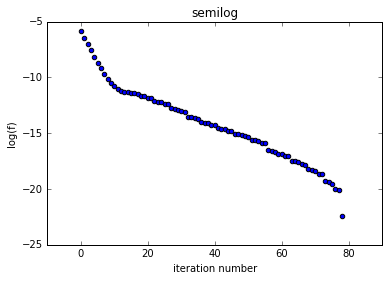

In [176]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (0, 1, 0)

In [183]:
x0 = np.array([0., 1., 0.])
xs = []
fs = []
x = method(A, x0)

case quadr
there is no suitable gamma. choosing random from 0 to 0.1
quadr gamma =  [ 0.0424377]
iter_num =  0
[-0.01308171 -0.99991443  0.        ]


In [184]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  100.01010101
x* =  [  1.01002996e-02   9.99948985e-01  -1.02095270e-04]
norm check:  1.0


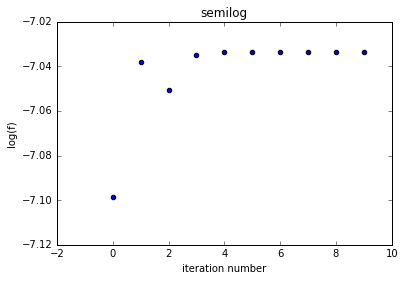

In [185]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(np.hstack((fminfstar[:np.argmin(fs)], fminfstar[np.argmin(fs) + 1:])))

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (-1, 1, 3)

In [186]:
x0 = np.array([-1., 1., 3.])
xs = []
fs = []
x = method(A, x0)

case quadr
quadr gamma =  0.00247177816264
iter_num =  0
[-0.30636981  0.23312799  0.92292409]
case quadr
quadr gamma =  0.0106599451871
iter_num =  20
[-0.12941694  0.0017534   0.99158872]
case quadr
quadr gamma =  0.00628638040959
iter_num =  40
[ 0.38972898 -0.00175864  0.92092792]
case quadr
quadr gamma =  0.117377369342
iter_num =  60
[ 0.64392192 -0.00735207  0.76505588]
case quadr
quadr gamma =  0.0116346724206
iter_num =  80
[ 0.69385347 -0.00690004  0.72008316]
case quadr
quadr gamma =  0.0625016524846
iter_num =  100
[ 0.70447332 -0.00715091  0.70969445]
case quadr
quadr gamma =  0.119753500117
iter_num =  120
[ 0.70762981 -0.0070914   0.70654778]
case quadr
quadr gamma =  0.0091834175719
iter_num =  140
[ 0.70852537 -0.00708438  0.70564978]
case quadr
quadr gamma =  0.0157873468383
iter_num =  160
[ 0.7087688  -0.0070879   0.70540523]


In [187]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224204457
x* =  [ 0.70881579 -0.00708734  0.70535803]
norm check:  1.0


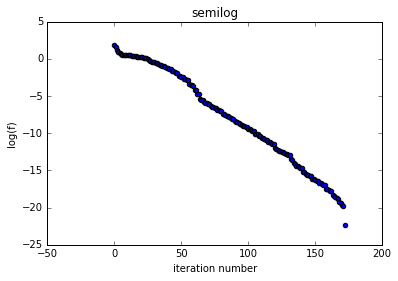

In [188]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (-1, -30, 3)

In [189]:
x0 = np.array([-1., -30., 3.])
xs = []
fs = []
x = method(A, x0)

case quadr
there is no suitable gamma. choosing random from 0 to 0.1
quadr gamma =  [ 0.05641812]
iter_num =  0
[ 0.00658969  0.99978005  0.01991028]


In [190]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  100.01010101
x* =  [ -1.01004895e-02  -9.99948984e-01   1.02026265e-04]
norm check:  1.0


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


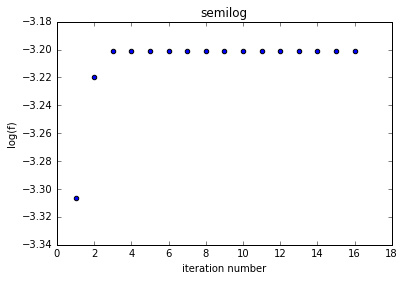

In [191]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (9, -30, 3)

In [204]:
x0 = np.array([9., -30., 3.])
xs = []
fs = []
x = method(A, x0)

case quadr
there is no suitable gamma. choosing random from 0 to 0.1
quadr gamma =  [ 0.01338279]
iter_num =  0
[ 0.66422207  0.71458293  0.21950006]
case quadr
quadr gamma =  0.00329640233534
iter_num =  20
[ 0.88953583 -0.01575766  0.45659358]
case quadr
quadr gamma =  0.0404698571182
iter_num =  40
[ 0.7891462  -0.00622425  0.61417386]
case quadr
quadr gamma =  0.0136759243282
iter_num =  60
[ 0.73045885 -0.00741368  0.68291647]
case quadr
quadr gamma =  0.0111344519649
iter_num =  80
[ 0.71567529 -0.00716939  0.69839636]
case quadr
quadr gamma =  0.00723421875016
iter_num =  100
[ 0.710606   -0.0071159   0.70355417]
case quadr
quadr gamma =  0.0902830017769
iter_num =  120
[ 0.70936143 -0.00708077  0.70480935]
case quadr
quadr gamma =  0.0265184960969
iter_num =  140
[ 0.70897078 -0.00709103  0.70520221]


In [205]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224323638
x* =  [ 0.70888903 -0.00708895  0.7052844 ]
norm check:  1.0


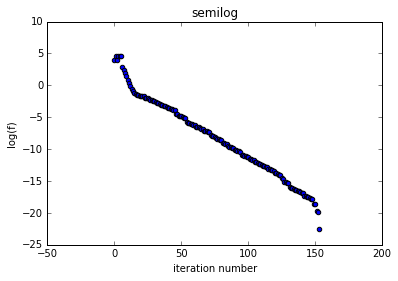

In [206]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()